In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [6]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
X_train.shape

(60000, 28, 28)

In [9]:
y_test.shape

(10000,)

In [21]:
y_train[0]

5

In [10]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [15]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])

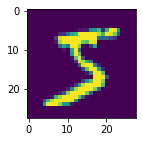

In [16]:
plot_sample(X_train,y_train,0)

In [20]:
# Normalize 
X_train = X_train / 255.0
X_test  = X_test / 255.0

In [34]:
# flatten into 1 D
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened  = X_test.reshape(len(X_test),28*28)

In [36]:
X_train_flattened.shape

(60000, 784)

In [31]:
# To 1 Dimension
y_train = y_train.reshape(-1,)
y_test  = y_test.reshape(-1,)

In [44]:
# build ANN Model
ann = models.Sequential([
      # simple ann with no hidden layer 
      layers.Dense(10,
                   input_shape = (784,),
                   activation = 'softmax')
])

ann.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

ann.fit(X_train_flattened,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7832 - accuracy: 0.8108
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4591 - accuracy: 0.8788
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4055 - accuracy: 0.8896
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3785 - accuracy: 0.8962
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3614 - accuracy: 0.9003


In [45]:
ann.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3362 - accuracy: 0.9094


[0.33624935150146484, 0.9093999862670898]

In [46]:
# accuracy 49% at 5 epochs
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

y_pred = ann.predict(X_test_flattened)

y_pred_classes = [np.argmax(elem) for elem in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.95      0.97      0.96      1135
           2       0.92      0.87      0.89      1032
           3       0.90      0.89      0.90      1010
           4       0.90      0.93      0.91       982
           5       0.88      0.85      0.87       892
           6       0.93      0.94      0.93       958
           7       0.93      0.89      0.91      1028
           8       0.86      0.87      0.86       974
           9       0.88      0.89      0.88      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [50]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    3,    2,    0,    3,    7,    1,    5,    0],
       [   0, 1103,    2,    3,    1,    2,    4,    1,   19,    0],
       [  10,    9,  893,   18,   14,    2,   16,   18,   44,    8],
       [   5,    2,   19,  901,    1,   37,    3,   11,   19,   12],
       [   1,    4,    3,    1,  912,    1,    9,    1,    8,   42],
       [  10,    3,    1,   37,   14,  761,   16,    6,   35,    9],
       [  14,    3,    6,    1,   15,   15,  900,    1,    3,    0],
       [   3,   19,   28,    4,   12,    0,    0,  919,    3,   40],
       [  10,    9,    9,   23,    8,   26,   13,   14,  848,   14],
       [   9,    7,    5,   10,   39,   17,    0,   17,    7,  898]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

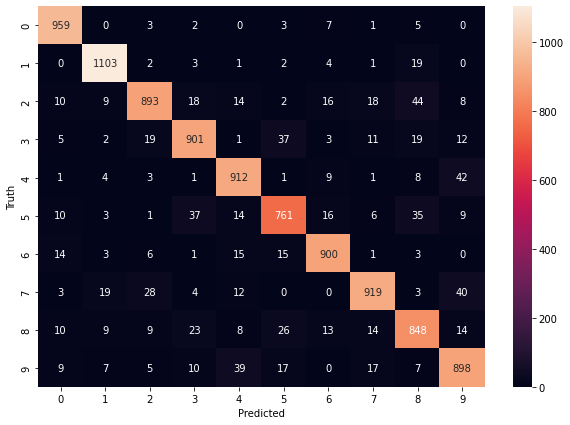

In [51]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
# use hidden layers
ann = models.Sequential([
      keras.layers.Flatten(input_shape = (28,28)),
      keras.layers.Dense(100,activation = 'relu'),
      keras.layers.Dense(10,activation = 'sigmoid')
])

ann.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# ann.fit(X_train_flattened,y_train,epochs = 5)
ann.fit(X_train,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6602 - accuracy: 0.8322
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3394 - accuracy: 0.9049
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2897 - accuracy: 0.9179
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2588 - accuracy: 0.9264
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2357 - accuracy: 0.9333


In [54]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2184 - accuracy: 0.9380


[0.21844696998596191, 0.9380000233650208]

In [56]:
cnn = models.Sequential([
    # cnn --
    # filter 개수와 filter 크기
    layers.Conv2D(
        filters = 32,
        activation = 'relu',
        kernel_size = (3,3),
        input_shape = (28,28,1)
    ),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(
        filters = 64,
        activation = 'relu',
        kernel_size = (3,3),
        input_shape = (28,28,1)
    ),
    layers.MaxPooling2D((2,2)),

    # dense network
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [57]:
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [59]:
cnn.fit(X_train,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0496 - accuracy: 0.9846
Epoch 2/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0330 - accuracy: 0.9897
Epoch 3/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0246 - accuracy: 0.9924
Epoch 4/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0187 - accuracy: 0.9939
Epoch 5/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0140 - accuracy: 0.9954


In [60]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.0302 - accuracy: 0.9920


[0.030170800164341927, 0.9919999837875366]

In [61]:
y_pred = cnn.predict(X_test)

In [62]:
y_classes = [np.argmax(elem) for elem in y_pred]

In [65]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

y_pred_classes = [np.argmax(elem) for elem in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [66]:
y_pred_classes[:5]

[7, 2, 1, 0, 4]

In [67]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)